In [1]:
%matplotlib inline
import numpy
import matplotlib
import matplotlib.pyplot as plt
import pandas
import seaborn
seaborn.set_context({"figure.figsize": (16, 8)})
matplotlib.rcParams['axes.labelsize'] = 16
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12

In [2]:
def do_plots(species, label, lengthticks=[3, 4, 5, 6],
             lengthticklabs=['1,000', '10,000', '100,000', '1,000,000'],
             lengthbins=numpy.linspace(2.75, 6.0, 40),
             gcbins=numpy.linspace(20, 80, 40)):
    ilocusdata = pandas.read_table('species/{}/{}.iloci.tsv'.format(species, species))
    milocusdata = pandas.read_table('species/{}/{}.miloci.tsv'.format(species, species))
    ilocusdata['LogLength'] = numpy.log10(ilocusdata['Length'])
    milocusdata['LogLength'] = numpy.log10(milocusdata['Length'])
    siloci = ilocusdata.loc[(ilocusdata.LocusClass == 'siLocus')]
    miloci = milocusdata.loc[(milocusdata.LocusClass == 'miLocus')]
    singleton_siloci = milocusdata.loc[(milocusdata.LocusClass == 'siLocus')]
    singleton_locuspos = [lp[6:-1] for lp in singleton_siloci['LocusPos']]
    milocus_siloci = siloci.loc[~(siloci.LocusPos.isin(singleton_locuspos))]
    fig, axes = plt.subplots(1, 2)
    ax1, ax2 = axes
    _ = ax1.hist(singleton_siloci['LogLength'], bins=lengthbins, alpha=0.5)
    _ = ax1.hist(milocus_siloci['LogLength'], bins=lengthbins, alpha=0.5)
    _ = ax1.set_title('siLocus Length ({})'.format(label))
    _ = ax1.set_xlabel('Length (bp)')
    _ = ax1.set_ylabel('Frequency')
    _ = ax1.legend(loc='upper right', labels=('Unmerged', 'Merged'))
    if lengthticks:
        _ = ax1.set_xticks(lengthticks)
    if lengthticklabs:
        _ = ax1.set_xticklabels(lengthticklabs)
    _ = ax2.hist(singleton_siloci['GCContent'] * 100, bins=gcbins, alpha=0.5)
    _ = ax2.hist(milocus_siloci['GCContent'] * 100, bins=gcbins, alpha=0.5)
    _ = ax2.set_title('siLocus Nucleotide Composition ({})'.format(label))
    _ = ax2.set_xlabel('% GC Content')
    _ = ax2.set_ylabel('Frequency')
    _ = ax2.legend(loc='upper right', labels=('Unmerged', 'Merged'))

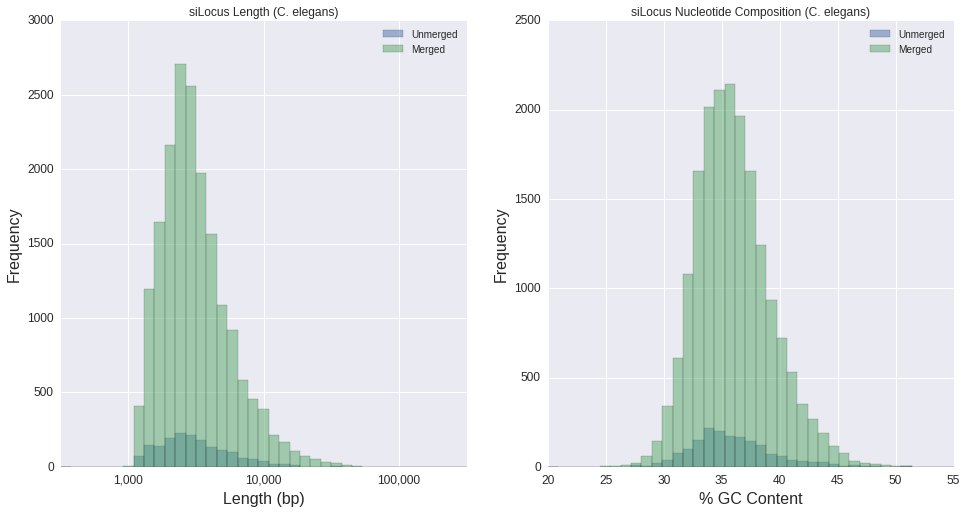

In [3]:
do_plots('Cele', 'C. elegans', lengthticks=[3, 4, 5], lengthticklabs=['1,000', '10,000', '100,000'],
         lengthbins=numpy.linspace(2.5, 5.5, 40), gcbins=numpy.linspace(20, 55, 40))

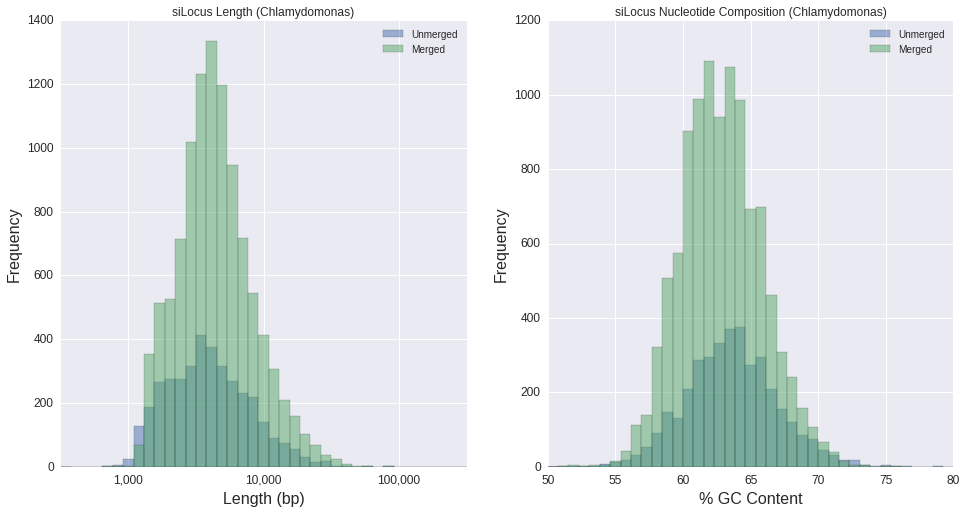

In [4]:
do_plots('Crei', 'Chlamydomonas', lengthticks=[3, 4, 5], lengthticklabs=['1,000', '10,000', '100,000'],
         lengthbins=numpy.linspace(2.5, 5.5, 40), gcbins=numpy.linspace(50, 80, 40))

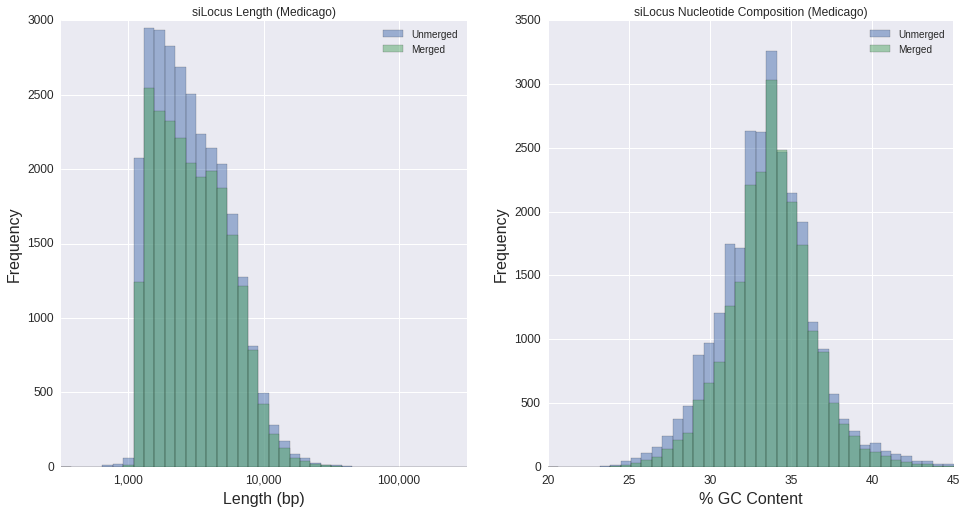

In [5]:
do_plots('Mtru', 'Medicago', lengthticks=[3, 4, 5], lengthticklabs=['1,000', '10,000', '100,000'],
         lengthbins=numpy.linspace(2.5, 5.5, 40), gcbins=numpy.linspace(20, 45, 40))

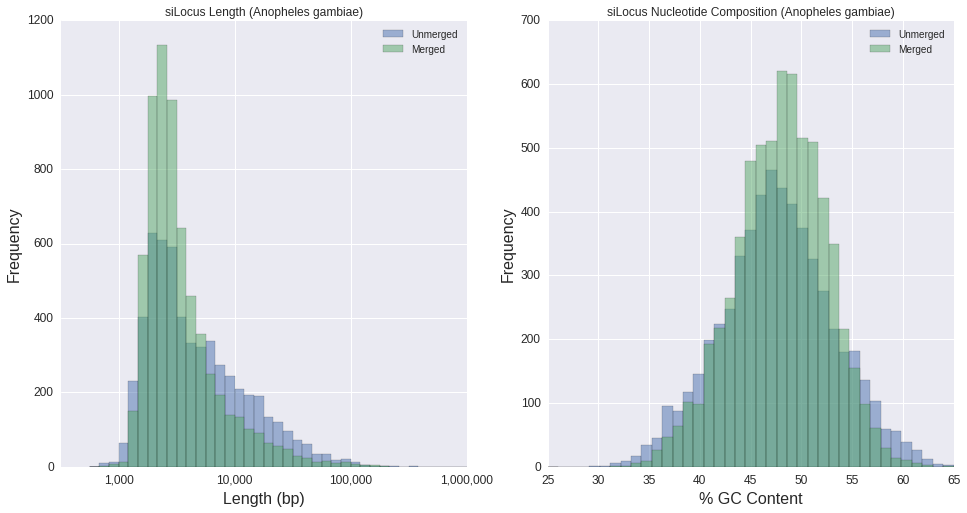

In [6]:
do_plots('Agam', 'Anopheles gambiae', gcbins=numpy.linspace(25, 65, 40))

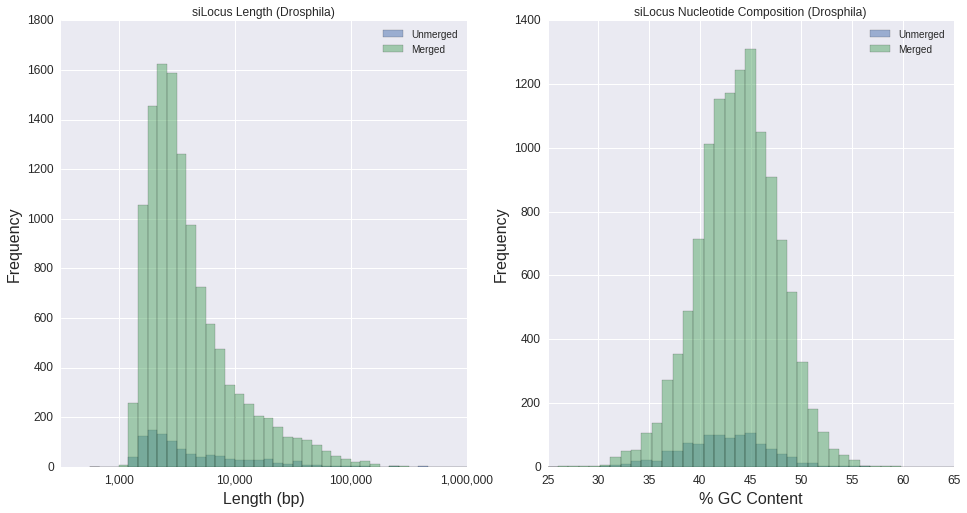

In [7]:
do_plots('Dmel', 'Drosphila', gcbins=numpy.linspace(25, 65, 40))

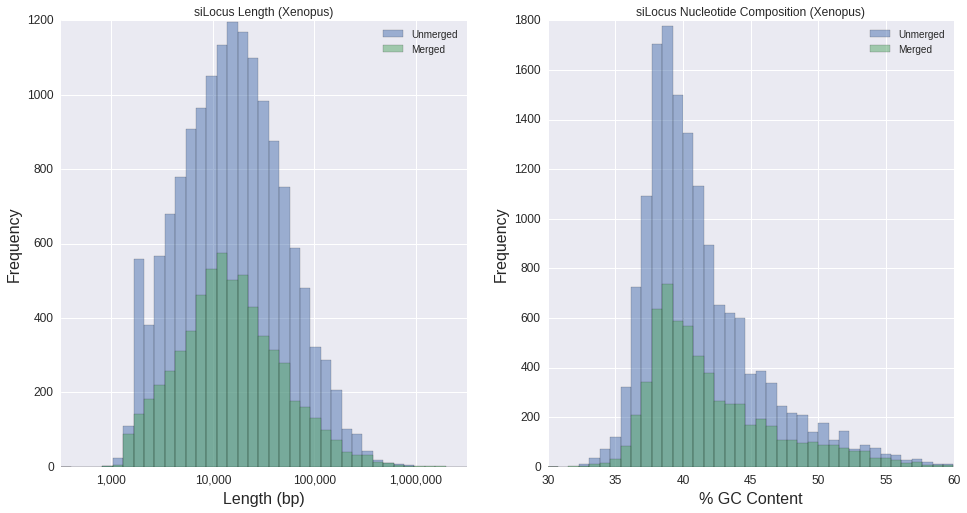

In [8]:
do_plots('Xtro', 'Xenopus', lengthbins=numpy.linspace(2.5, 6.5, 40), gcbins=numpy.linspace(30, 60, 40))

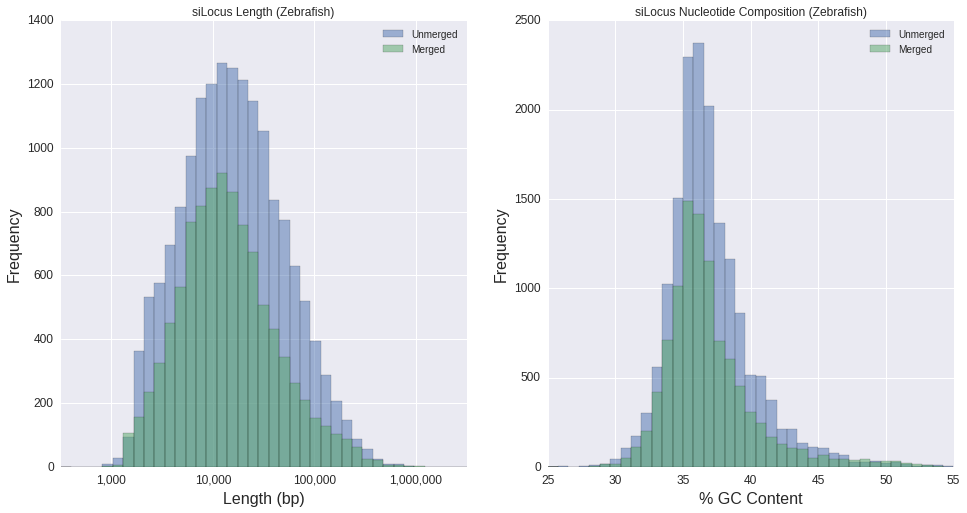

In [9]:
do_plots('Drer', 'Zebrafish', lengthbins=numpy.linspace(2.5, 6.5, 40), gcbins=numpy.linspace(25, 55, 40))

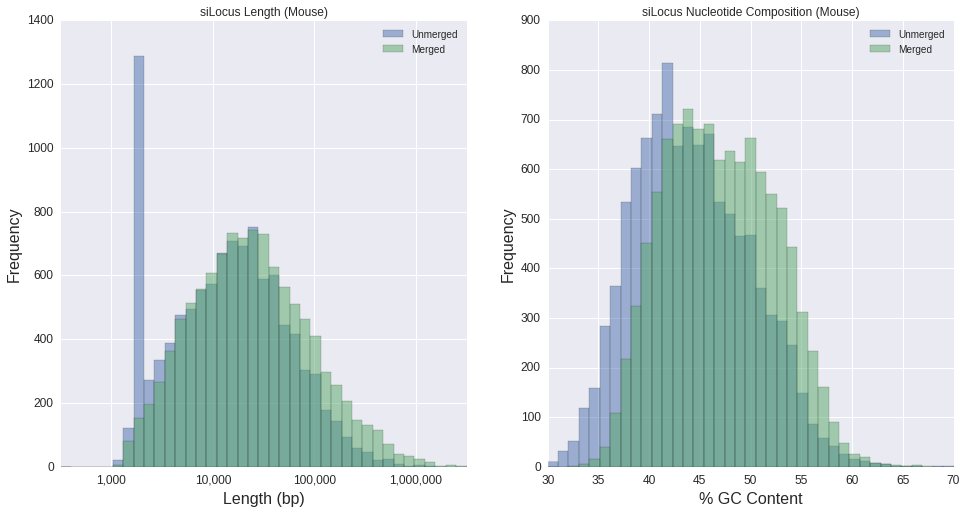

In [10]:
do_plots('Mmus', 'Mouse', lengthbins=numpy.linspace(2.5, 6.5, 40), gcbins=numpy.linspace(30, 70, 40))

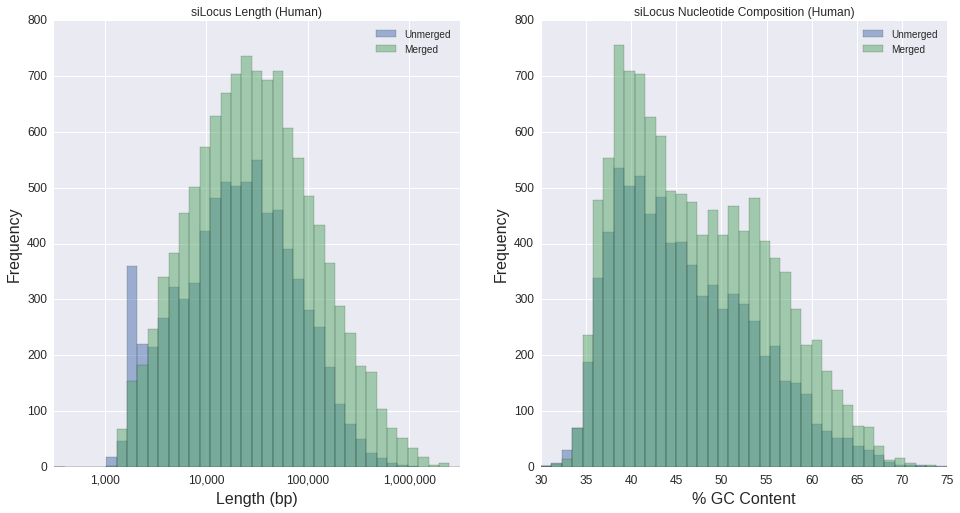

In [11]:
do_plots('Hsap', 'Human', lengthbins=numpy.linspace(2.5, 6.5, 40), gcbins=numpy.linspace(30, 75, 40))

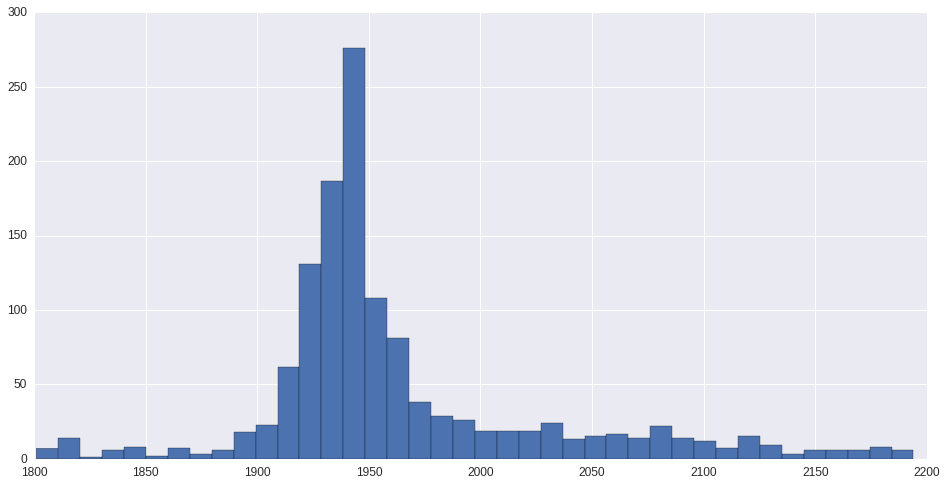

In [17]:
species = 'Mmus'
ilocusdata = pandas.read_table('species/{}/{}.iloci.tsv'.format(species, species))
milocusdata = pandas.read_table('species/{}/{}.miloci.tsv'.format(species, species))
ilocusdata['LogLength'] = numpy.log10(ilocusdata['Length'])
milocusdata['LogLength'] = numpy.log10(milocusdata['Length'])
siloci = ilocusdata.loc[(ilocusdata.LocusClass == 'siLocus')]
miloci = milocusdata.loc[(milocusdata.LocusClass == 'miLocus')]
singleton_siloci = milocusdata.loc[(milocusdata.LocusClass == 'siLocus')]
peak = singleton_siloci.loc[(singleton_siloci.Length > 1800) & (singleton_siloci.Length < 2200)]
_ = plt.hist(peak['Length'], bins=40)

In [19]:
ioi = siloci.loc[(siloci.Length > 1920) & (siloci.Length < 1980)]
ioi.sample(n=5)

,Species,LocusId,SeqID,LocusPos,Length,EffectiveLength,GCContent,GCSkew,NContent,LocusClass,GeneCount,SeqUnannot,FlankGeneOrient,LogLength
5348,Mmus,MmusILC-05349,NC_000068.7,NC_000068.7_87047796-87049734,1939,1939,0.341,0.094,0.0,siLocus,1,False,NaN,3.287578
5424,Mmus,MmusILC-05425,NC_000068.7,NC_000068.7_87867493-87869425,1933,1933,0.326,-0.054,0.0,siLocus,1,False,NaN,3.286232
20918,Mmus,MmusILC-20919,NC_000072.6,NC_000072.6_131658658-131660584,1927,1927,0.373,0.010,0.0,siLocus,1,False,NaN,3.284882
55395,Mmus,MmusILC-55396,NC_000085.6,NC_000085.6_13145234-13147157,1924,1924,0.382,0.116,0.0,siLocus,1,False,NaN,3.284205
22092,Mmus,MmusILC-22093,NC_000073.6,NC_000073.6_20786785-20788708,1924,1924,0.375,-0.074,0.0,siLocus,1,False,NaN,3.284205


In [20]:
ioi.sample(n=5)

,Species,LocusId,SeqID,LocusPos,Length,EffectiveLength,GCContent,GCSkew,NContent,LocusClass,GeneCount,SeqUnannot,FlankGeneOrient,LogLength
55294,Mmus,MmusILC-55295,NC_000085.6,NC_000085.6_11827577-11829524,1948,1948,0.451,0.010,0.0,siLocus,1,False,NaN,3.289589
22070,Mmus,MmusILC-22071,NC_000073.6,NC_000073.6_20417442-20419365,1924,1924,0.376,-0.073,0.0,siLocus,1,False,NaN,3.284205
5538,Mmus,MmusILC-05539,NC_000068.7,NC_000068.7_89124294-89126229,1936,1936,0.370,0.070,0.0,siLocus,1,False,NaN,3.286905
48447,Mmus,MmusILC-48448,NC_000081.6,NC_000081.6_98455812-98457747,1936,1936,0.476,-0.078,0.0,siLocus,1,False,NaN,3.286905
21739,Mmus,MmusILC-21740,NC_000073.6,NC_000073.6_13023208-13025129,1922,8298,0.648,0.014,0.0,siLocus,1,False,NaN,3.283753


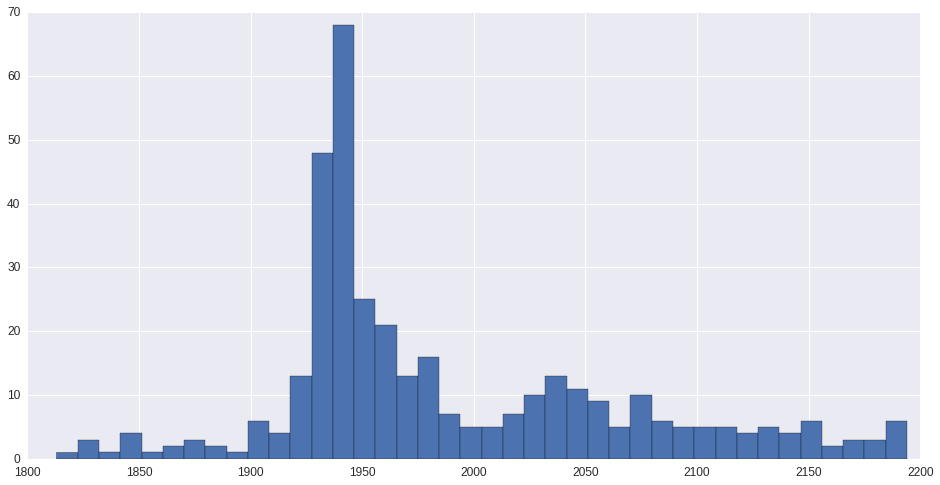

In [21]:
species = 'Hsap'
ilocusdata = pandas.read_table('species/{}/{}.iloci.tsv'.format(species, species))
milocusdata = pandas.read_table('species/{}/{}.miloci.tsv'.format(species, species))
ilocusdata['LogLength'] = numpy.log10(ilocusdata['Length'])
milocusdata['LogLength'] = numpy.log10(milocusdata['Length'])
siloci = ilocusdata.loc[(ilocusdata.LocusClass == 'siLocus')]
miloci = milocusdata.loc[(milocusdata.LocusClass == 'miLocus')]
singleton_siloci = milocusdata.loc[(milocusdata.LocusClass == 'siLocus')]
peak = singleton_siloci.loc[(singleton_siloci.Length > 1800) & (singleton_siloci.Length < 2200)]
_ = plt.hist(peak['Length'], bins=40)

In [22]:
ioi = siloci.loc[(siloci.Length > 1920) & (siloci.Length < 1980)]
ioi.sample(n=5)

,Species,LocusId,SeqID,LocusPos,Length,EffectiveLength,GCContent,GCSkew,NContent,LocusClass,GeneCount,SeqUnannot,FlankGeneOrient,LogLength
34895,Hsap,HsapILC-34896,NC_000011.10,NC_000011.10_124381902-124383843,1942,1942,0.393,0.077,0.0,siLocus,1,False,NaN,3.288249
32322,Hsap,HsapILC-32323,NC_000011.10,NC_000011.10_7927218-7929162,1945,1945,0.351,0.012,0.0,siLocus,1,False,NaN,3.288920
24426,Hsap,HsapILC-24427,NC_000007.14,NC_000007.14_144049902-144051837,1936,1936,0.466,-0.083,0.0,siLocus,1,False,NaN,3.286905
5701,Hsap,HsapILC-05702,NC_000001.11,NC_000001.11_247840428-247842396,1969,1969,0.427,0.111,0.0,siLocus,1,False,NaN,3.294246
45871,Hsap,HsapILC-45872,NC_000017.11,NC_000017.11_3396966-3398910,1945,1945,0.420,0.067,0.0,siLocus,1,False,NaN,3.288920


In [23]:
ioi.sample(n=5)

,Species,LocusId,SeqID,LocusPos,Length,EffectiveLength,GCContent,GCSkew,NContent,LocusClass,GeneCount,SeqUnannot,FlankGeneOrient,LogLength
33115,Hsap,HsapILC-33116,NC_000011.10,NC_000011.10_56663186-56665118,1933,1933,0.398,-0.105,0.0,siLocus,1,False,NaN,3.286232
39527,Hsap,HsapILC-39528,NC_000014.9,NC_000014.9_21569303-21571244,1942,1942,0.449,0.127,0.0,siLocus,1,False,NaN,3.288249
36381,Hsap,HsapILC-36382,NC_000012.12,NC_000012.12_55425754-55427692,1939,1939,0.332,-0.104,0.0,siLocus,1,False,NaN,3.287578
33111,Hsap,HsapILC-33112,NC_000011.10,NC_000011.10_56612055-56614002,1948,1948,0.373,0.034,0.0,siLocus,1,False,NaN,3.289589
51103,Hsap,HsapILC-51104,NC_000019.10,NC_000019.10_35351042-35352964,1923,1923,0.646,-0.025,0.0,siLocus,1,False,NaN,3.283979
